In [52]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import pickle

In [2]:
inp_train = pd.read_csv("train.csv")

In [3]:
inp_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


### Randomizing data

In [4]:
# ------------------- 

inp_train = inp_train.sample(frac =1)
inp_train.shape

(20800, 5)

In [5]:
#inp_train[['title','label']].iloc[:18000,:].to_csv("t5_tarin.csv", sep ="\t", index = False)

In [6]:
#inp_train[['title','label']].iloc[18000:,:].to_csv("t5_validate.csv", sep ="\t", index = False)

## Check for class imbalance

/home/mps/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

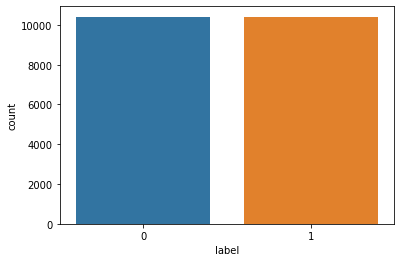

In [7]:
sns.countplot(inp_train.label)

In [8]:
inp_train.label.value_counts()

1    10413
0    10387
Name: label, dtype: int64

### Approxmatly same records in both classes

In [9]:
list(inp_train.text)[:1]

['WASHINGTON  —   Defense Secretary Ashton B. Carter on Thursday removed one of the final barriers to military service by lifting the Pentagon’s ban on transgender people serving openly in the armed forces. “Effective immediately, transgender Americans may serve openly,” Mr. Carter said. “They can no longer be discharged or otherwise separated from the military just for being transgender. ” The decision pushes forward a transformation of the military that Mr. Carter has accelerated in the last year with the opening of all combat roles to women and the appointment of the first openly gay Army secretary. He made his feelings on ending the transgender ban clear last year, when he called it outdated and ordered officials across the military to begin examining what would need to be done to lift it. When Mr. Carter ordered that assessment, there were already thousands of transgender people in the military. But until Thursday, most had been forced into an existence shrouded in secrecy to avoi

In [10]:
list(inp_train.title)[:1]

['Transgender People Will Be Allowed to Serve Openly in Military - The New York Times']

### Text content is vey big we cannot feed this big data to model, it will take a whole lot of time and memory to train

## Only two features are of importance
1. title 
3. label

In [11]:
inp_train = inp_train.drop(['id','author', 'text'], axis =1)

In [12]:
inp_train.head()

,title,label
6196,Transgender People Will Be Allowed to Serve Op...,0
1749,"Rurik Jutting, British Banker, Convicted of Mu...",0
5409,Bob Dylan Sends Warm Words but Skips Nobel Pri...,0
11935,A Veteran Con Man Works a New Crowd With an Ol...,0
7175,’NieR: Automata’ – ’Death is Your Beginning’ L...,0


In [13]:
list(inp_train.title)[:10]

['Transgender People Will Be Allowed to Serve Openly in Military - The New York Times',
 'Rurik Jutting, British Banker, Convicted of Murdering 2 Women in Hong Kong - The New York Times',
 'Bob Dylan Sends Warm Words but Skips Nobel Prize Ceremonies - The New York Times',
 'A Veteran Con Man Works a New Crowd With an Old Trick - The New York Times',
 '’NieR: Automata’ – ’Death is Your Beginning’ Launch Trailer - Breitbart',
 'Guess Who Ordered Hillary To Leave Our Men To Die In Benghazi',
 'Laurie the Moose Lady Puts ‘Heart and Soul’ Into Roadkill - The New York Times',
 'Rosneft restaurera une ancienne résidence des Romanov près de Saint-Pétersbourg',
 'Netflix Casts a Wider Net for Original Documentaries - The New York Times',
 'Trump Diversifies Cabinet Picks Nikki Haley and Betsy DeVos - The New York Times']

## Length checkig

In [14]:
lengths = []
for i in list(inp_train.title):
    lengths.append(len(str(i).split(" ")))

In [15]:
max(lengths)

72

In [16]:
counter = 0
for i in lengths:
    if(i<20):
        counter+=1
counter

20209

## length stats are
1. 5382 records of length less than 10 words
2. 20209 records of length less than 20 words
3. 14827 records in between 10 to 20 word lengths


In [17]:
def clean_title(x):
    import re
    x = x.replace(":"," ")
    x = x.replace("-"," ")
    x = x.replace(","," ")
    x = re.sub("\s+"," ",x)
    return x
    

In [18]:
inp_train = inp_train.astype(str)
inp_train["title"] = inp_train["title"].apply(lambda a: clean_title(a))

In [19]:
inp_train.head()

,title,label
6196,Transgender People Will Be Allowed to Serve Op...,0
1749,Rurik Jutting British Banker Convicted of Murd...,0
5409,Bob Dylan Sends Warm Words but Skips Nobel Pri...,0
11935,A Veteran Con Man Works a New Crowd With an Ol...,0
7175,’NieR Automata’ – ’Death is Your Beginning’ La...,0


## Now we need a vectorizer method
- There are lots of vectorizer methods
- Tfidf, Bag of words, word to vect, glove, fasttext, elmo, bert
- will use BERT based sentence encoder

In [185]:
import sentence_transformers
from sentence_transformers import SentenceTransformer, util
import numpy as np
import psutil
import pandas as pd
from datetime import datetime
d1 = datetime.now()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# ------------ I have downloaded this vectorizer model
model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

In [25]:
# model.max_seq_length = 20

## Encoding input data using BERT word piece model

In [26]:
corpus_embeddings = model.encode(list(inp_train.title), convert_to_tensor=True)

## Save embeddings so that you do not have to embedd it again because it takes time

In [53]:

with open('fake_news.pkl', "wb") as fOut:
    pickle.dump({'labels': inp_train.label, 'embeddings': corpus_embeddings}, fOut)

## Load Embeddings

In [142]:

with open('fake_news.pkl', 'rb') as f:
    data = pickle.load(f)
    corpus_embeddings =  data["embeddings"]
    labels = data["labels"]

In [143]:
corpus_embeddings.shape

torch.Size([20800, 768])

In [144]:
#corpus_embeddings = corpus_embeddings[:, :30]

## Split in to train and validation

In [145]:
train_x, test_x, train_y, test_y = train_test_split(corpus_embeddings,labels, test_size = .1)

In [146]:
train_x.shape, test_x.shape

(torch.Size([18720, 768]), torch.Size([2080, 768]))

## Use a classifier

In [147]:
clf = LogisticRegression()

In [148]:
clf.fit(train_x, train_y)

/home/mps/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [149]:
pred = clf.predict(test_x)

In [168]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [159]:
np.array(test_y)

array(['1', '0', '0', ..., '0', '0', '1'], dtype=object)

In [160]:
pred

array(['1', '0', '0', ..., '0', '1', '1'], dtype=object)

## Get evaluation metrices

In [205]:


print("train accuracy",accuracy_score(clf.predict(train_x), np.array(train_y)))
print("validation accuracy",accuracy_score(pred, np.array(test_y)))
print("precision",precision_score(pred, np.array(test_y), pos_label ='0'))
print("recall",recall_score(pred, np.array(test_y), pos_label ='0'))
print("f1",f1_score(pred, np.array(test_y), pos_label ='0'))
print("confusion metrics",confusion_matrix(pred, np.array(test_y)))


train accuracy 0.9132478632478632
validation accuracy 0.8884615384615384
precision 0.8807692307692307
recall 0.89453125
f1 0.8875968992248061
confusion metrics [[916 108]
 [124 932]]


## There is a difference of around 2.5% in train and test accuracies which is quite good means model is not overfitting much, its a good generalised model.

In [174]:
true_pos = 916
false_neg = 108
false_pos = 124
true_neg = 932
prec = 916/(916+124)
recal = 916/(916+108)
prec, recal

(0.8807692307692307, 0.89453125)

## Getting test results

In [177]:
inp_test = pd.read_csv("test.csv")

In [178]:
inp_test.shape

(5200, 4)

In [179]:
inp_test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [182]:
# ------------- remove columns

inp_test.drop(['author', 'text'], axis = 1)

,id,title
0,20800,"Specter of Trump Loosens Tongues, if Not Purse..."
1,20801,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ..."
4,20804,Keiser Report: Meme Wars (E995)
...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...
5197,25997,"California Today: What, Exactly, Is in Your Su..."
5198,25998,300 US Marines To Be Deployed To Russian Borde...


In [183]:
inp_test = inp_test.astype(str)
inp_test["title"] = inp_test["title"].apply(lambda a: clean_title(a))

In [186]:
test_corpus_embeddings = model.encode(list(inp_test.title), convert_to_tensor=True)

In [187]:
test_pred = clf.predict(test_corpus_embeddings)

In [198]:
result_dict ={'id':[], 'prediction' : []}

In [199]:
result_dict['id'].extend(list(inp_test.id))
result_dict['prediction'].extend(list(test_pred))

In [201]:
#result_dict

In [202]:
result_df = pd.DataFrame(result_dict)

In [203]:
result_df.to_csv("fake_news_test_result.csv", index = False)

# Future Work : Further we can use neural nets to classify

## -------------- USE Neural Networks to get classification ------------------

In [100]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [135]:
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=768, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [136]:
model = create_baseline()

In [137]:
#model.fit(np.array(train_x),np.array(train_y),validation_data=(np.array(test_x),np.array(test_y)),epochs=20,batch_size=64)
# model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=20,batch_size=64)

In [138]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 60)                46140     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 61        
Total params: 46,201
Trainable params: 46,201
Non-trainable params: 0
_________________________________________________________________
